<a href="https://colab.research.google.com/github/troncosofranco/ML-Notebooks/blob/main/Fraud_Detection_w_MLFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn attributes
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix
from sklearn.model_selection import KFold

# MLFlow attributes
!pip install mlflow
!pip install mlflow --quiet
import mlflow
import mlflow.sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 KB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.4/210.4 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62

In [2]:
#Module version
import matplotlib
import sklearn
print("Numpy: {}".format(np.__version__))
print("Pandas: {}".format(pd.__version__))
print("seaborn: {}".format(matplotlib.__version__))
print("seaborn: {}".format(sns.__version__))
print("Scikit-Learn: {}".format(sklearn.__version__))
print("MLFlow: {}".format(mlflow.__version__))

Numpy: 1.21.6
Pandas: 1.3.5
seaborn: 3.2.2
seaborn: 0.11.2
Scikit-Learn: 1.0.2
MLFlow: 2.1.1


#2. Load Data

In [3]:
df = pd.read_csv('creditcard.csv')
df = df.drop("Time", axis=1)

In [4]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#3. Data Processing

Split the data

In [5]:
normal = df[df.Class == 0].sample(frac=0.5, random_state=2020).reset_index(drop=True)
anomaly = df[df.Class == 1]

#Test size
print(f"Normal: {normal.shape}")
print(f"Anomaly: {anomaly.shape}")

Normal: (142158, 30)
Anomaly: (492, 30)


In [6]:
normal_train, normal_test = train_test_split(normal, test_size = 0.2, random_state = 2020)
anomaly_train, anomaly_test = train_test_split (anomaly, test_size = 0.2, random_state = 2020)

In [7]:
normal_train, normal_validate = train_test_split(normal_train, test_size = 0.25, random_state = 2020)
anomaly_train, anomaly_validate = train_test_split (anomaly_train, test_size = 0.25, random_state = 2020)

Define x-y splits.

In [8]:
x_train = pd.concat((normal_train, anomaly_train))
x_test = pd.concat((normal_test, anomaly_test))
x_validate = pd.concat((normal_validate, anomaly_validate))
y_train = np.array(x_train["Class"])
y_test = np.array(x_test["Class"])
y_validate = np.array(x_validate["Class"])

In [9]:
x_train = x_train.drop("Class", axis=1)
x_test = x_test.drop("Class", axis=1)
x_validate = x_validate.drop("Class", axis=1)

Shapes of these sets

In [10]:
print("Training sets:\nx_train: {} \ny_train:{}".format(x_train.shape, y_train.shape))
print("\nTesting sets:\nx_test: {} \ny_test: {}".format(x_test.shape, y_test.shape))
print("\nValidation sets:\nx_validate: {} \ny_validate: {}". format(x_validate.shape, y_validate.shape))

Training sets:
x_train: (85588, 29) 
y_train:(85588,)

Testing sets:
x_test: (28531, 29) 
y_test: (28531,)

Validation sets:
x_validate: (28531, 29) 
y_validate: (28531,)


Scale data using scikit-learn’s standard scaler

In [11]:
scaler = StandardScaler()
scaler.fit(pd.concat((normal, anomaly)).drop("Class", axis=1))
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_validate = scaler.transform(x_validate)

## Training and Evaluating with MLFlow

Define train function.

In [12]:
def train(sk_model, x_train, y_train):
 sk_model = sk_model.fit(x_train, y_train)
 train_acc = sk_model.score(x_train, y_train)

 # MLflow track of train_acc metric in each run
 mlflow.log_metric("train_acc", train_acc)
 print(f"Train Accuracy: {train_acc:.3%}")

Define evaluation function.

In [13]:
def evaluate(sk_model, x_test, y_test):
 eval_acc = sk_model.score(x_test, y_test)
 preds = sk_model.predict(x_test)
 auc_score = roc_auc_score(y_test, preds)

 # MLFlow track
 mlflow.log_metric("eval_acc", eval_acc)
 mlflow.log_metric("auc_score", auc_score)

 print(f"Auc Score: {auc_score:.3%}")
 print(f"Eval Accuracy: {eval_acc:.3%}")

 roc_plot = plot_roc_curve(sk_model, x_test, y_test, name='Scikit-learn ROC Curve')
 plt.savefig("sklearn_roc_plot.png")
 plt.show()
 plt.clf()
 conf_matrix = confusion_matrix(y_test, preds)
 ax = sns.heatmap(conf_matrix, annot=True,fmt='g')
 ax.invert_xaxis()
 ax.invert_yaxis()
 plt.ylabel('Actual')
 plt.xlabel('Predicted')
 plt.title("Confusion Matrix")
 plt.savefig("sklearn_conf_matrix.png")

 #MLFlow save images and graphics
 mlflow.log_artifact("sklearn_roc_plot.png")
 mlflow.log_artifact("sklearn_conf_matrix.png")

Run MLFlow experiment.

2023/01/11 19:00:47 INFO mlflow.tracking.fluent: Experiment with name 'scikit_learn_experiment' does not exist. Creating a new experiment.


Train Accuracy: 99.893%
Auc Score: 85.341%
Eval Accuracy: 99.874%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


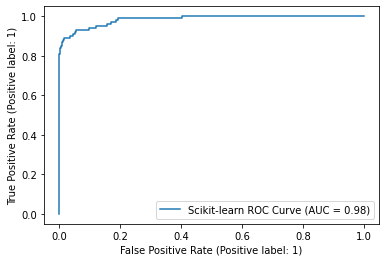

Model run:  884f69e5d9dd4a869c3dc95758b143e9


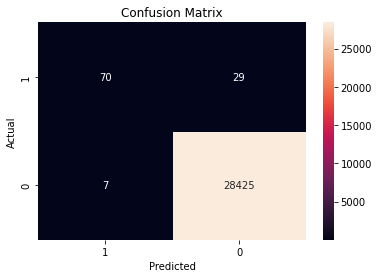

In [14]:
sk_model = LogisticRegression(random_state=None, max_iter=400, solver='newton-cg')

mlflow.set_experiment("scikit_learn_experiment")
with mlflow.start_run():
 train(sk_model, x_train, y_train)
 evaluate(sk_model, x_test, y_test)

 #sk_model is saved as log_reg_model
 mlflow.sklearn.log_model(sk_model, "log_reg_model")
 # run tracking UI in the background
 get_ipython().system_raw("mlflow ui --port 5000 &")
 print("Model run: ", mlflow.active_run().info.run_uuid)

mlflow.end_run()

In [15]:
# create remote tunnel using ngrok.com to allow local port access
# borrowed from https://colab.research.google.com/github/alfozan/MLflow-GBRT-demo/blob/master/MLflow-GBRT-demo.ipynb#scrollTo=4h3bKHMYUIG6
!pip install pyngrok --quiet
from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
#NGROK_AUTH_TOKEN = ""
#ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
public_url = ngrok.connect(port="5000", proto="http", options={"bind_tls": True})
print("MLflow Tracking UI:", public_url)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
MLflow Tracking UI: NgrokTunnel: "http://cfeb-35-197-105-97.ngrok.io" -> "http://localhost:80"


Load model from MLFlow

In [16]:
#loaded_model = mlflow.sklearn.load_model("runs:/YOUR_RUNID_HERE/log_reg_model")
#loaded_model.score(x_test, y_test)

##Model Validation (Parameter Tuning) with MLFlow

In [17]:
anomaly_weights = [1, 5, 10, 15]
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=2020)

In [18]:
# Define validation script
mlflow.set_experiment("sklearn_creditcard_broad_search")
logs = []

for f in range(len(anomaly_weights)):
    fold = 1
    accuracies = []
    auc_scores= []
    for train, test in kfold.split(x_validate, y_validate):
        weight = anomaly_weights[f]
        class_weights= {0:1, 1: weight}
        sk_model = LogisticRegression(random_state=None, max_iter=400, solver='newton-cg', class_weight=class_weights).fit(x_validate[train], y_validate[train])
        
        for h in range(40): print('-', end="")
        print(f"\nfold {fold}\nAnomaly Weight: {weight}")
        train_acc = sk_model.score(x_validate[train], y_validate[train])
        mlflow.log_metric("train_acc", train_acc)

        eval_acc = sk_model.score(x_validate[test], y_validate[test])
        preds = sk_model.predict(x_validate[test])

        mlflow.log_metric("eval_acc", eval_acc)
        try:
            auc_score = roc_auc_score(y_validate[test], preds)
        except:
            auc_score = -1
        
        mlflow.log_metric("auc_score", auc_score)
      
        print("AUC: {}\neval_acc: {}".format(auc_score, eval_acc))
      
        accuracies.append(eval_acc)
        auc_scores.append(auc_score)
      
        log = [sk_model, x_validate[test], y_validate[test], preds]
        logs.append(log)

        mlflow.sklearn.log_model(sk_model, f"anom_weight_{weight}_fold_{fold}")
        fold = fold + 1

    print("\nAverages: ")
    print("Accuracy: ", np.mean(accuracies))
    print("AUC: ", np.mean(auc_scores))
    print("Best: ")
    print("Accuracy: ", np.max(accuracies))
    print("AUC: ", np.max(auc_scores))

2023/01/11 19:01:05 INFO mlflow.tracking.fluent: Experiment with name 'sklearn_creditcard_broad_search' does not exist. Creating a new experiment.


----------------------------------------
fold 1
Anomaly Weight: 1
AUC: 0.8
eval_acc: 0.9985982127212195
----------------------------------------
fold 2
Anomaly Weight: 1
AUC: 0.8568790049001132
eval_acc: 0.998422712933754
----------------------------------------
fold 3
Anomaly Weight: 1
AUC: 0.8406451922461774
eval_acc: 0.9982474588152822
----------------------------------------
fold 4
Anomaly Weight: 1
AUC: 0.8682452129973255
eval_acc: 0.9987732211706976
----------------------------------------
fold 5
Anomaly Weight: 1
AUC: 0.8528532875621686
eval_acc: 0.9989484752891693

Averages: 
Accuracy:  0.9985980161860246
AUC:  0.8437245395411569
Best: 
Accuracy:  0.9989484752891693
AUC:  0.8682452129973255
----------------------------------------
fold 1
Anomaly Weight: 5
AUC: 0.8748241603657465
eval_acc: 0.9987734361310671
----------------------------------------
fold 2
Anomaly Weight: 5
AUC: 0.975398919462244
eval_acc: 0.9982474588152822
----------------------------------------
fold 3
Anomaly

##Parameter Tuning – Guided Search with MLFlow

In [19]:
anomaly_weights = [10, 50, 100, 150, 200]
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=2020)

In [20]:
# Define validation script
mlflow.set_experiment("sklearn_creditcard_guided_search")
logs = []

for f in range(len(anomaly_weights)):
    fold = 1
    accuracies = []
    auc_scores= []
    for train, test in kfold.split(x_validate, y_validate):
        weight = anomaly_weights[f]
        class_weights= {0:1, 1: weight}
        sk_model = LogisticRegression(random_state=None, max_iter=400, solver='newton-cg', class_weight=class_weights).fit(x_validate[train], y_validate[train])
        
        for h in range(40): print('-', end="")
        print(f"\nfold {fold}\nAnomaly Weight: {weight}")
        train_acc = sk_model.score(x_validate[train], y_validate[train])
        mlflow.log_metric("train_acc", train_acc)

        eval_acc = sk_model.score(x_validate[test], y_validate[test])
        preds = sk_model.predict(x_validate[test])

        mlflow.log_metric("eval_acc", eval_acc)
        try:
            auc_score = roc_auc_score(y_validate[test], preds)
        except:
            auc_score = -1
        
        mlflow.log_metric("auc_score", auc_score)
      
        print("AUC: {}\neval_acc: {}".format(auc_score, eval_acc))
      
        accuracies.append(eval_acc)
        auc_scores.append(auc_score)
      
        log = [sk_model, x_validate[test], y_validate[test], preds]
        logs.append(log)

        mlflow.sklearn.log_model(sk_model, f"anom_weight_{weight}_fold_{fold}")
        fold = fold + 1

    print("\nAverages: ")
    print("Accuracy: ", np.mean(accuracies))
    print("AUC: ", np.mean(auc_scores))
    print("Best: ")
    print("Accuracy: ", np.max(accuracies))
    print("AUC: ", np.max(auc_scores))

2023/01/11 20:00:05 INFO mlflow.tracking.fluent: Experiment with name 'sklearn_creditcard_guided_search' does not exist. Creating a new experiment.


----------------------------------------
fold 1
Anomaly Weight: 10
AUC: 0.9243845612801126
eval_acc: 0.9982477659015244
----------------------------------------
fold 2
Anomaly Weight: 10
AUC: 0.9753109687146626
eval_acc: 0.9980722046968104
----------------------------------------
fold 3
Anomaly Weight: 10
AUC: 0.9313783507133262
eval_acc: 0.9985979670522257
----------------------------------------
fold 4
Anomaly Weight: 10
AUC: 0.8943851628367561
eval_acc: 0.9985979670522257
----------------------------------------
fold 5
Anomaly Weight: 10
AUC: 0.8820013855427915
eval_acc: 0.9985979670522257

Averages: 
Accuracy:  0.9984227743510024
AUC:  0.9214920858175297
Best: 
Accuracy:  0.9985979670522257
AUC:  0.9753109687146626
----------------------------------------
fold 1
Anomaly Weight: 50
AUC: 0.922626164937577
eval_acc: 0.9947432977045734
----------------------------------------
fold 2
Anomaly Weight: 50
AUC: 0.9734640030154541
eval_acc: 0.9943918682089029
--------------------------------